########Problem Statement#####
Movement:
Sensing movement automagically

"Improve the quality of life through continuous health and well-being monitor. The sensor tracks the quality of sleep and body vitals while a user is sleeping."

People move during their sleep. These movements are very important to track muscle activity which is a crucial parameter for sleep analysis. It is also an indication of restlessness during sleep. The test data folder contains 5 files of 4 minutes of vibration data each with some movement instances in them.

Approach:
The data is inferred to have the movement instances as Time Series. The approach is to find out the seconds of disturbed sleep. As evident it’s an unsupervised learning problem. The approach of KMeans clustering Or DBscan best fits this kind of problems, where by the data points are segregated into movement or no movement, by comparing with the earlier values consecutively.

Python (Jupyter notebook) is used for the coding.

The test CSV files are read to a single dataframe and a column heading is provided. Another column is added getting the difference from the just previous value (We can in fact grow these columns by taking difference from further values in the past).The plot gives a peek into the data. The multiple instances are averaged upon 250 rows to give the value of a single second. The Dataframe is reduced to 1200 seconds/rows that are across 4 minutes of averaged data.

The data is standardized as the two columns are having way different values in scale

DBscan with eps of 0.65 and min_samples of 60 (arrived after many runs of the algorithm), which gives a marked pattern of clusters  pointing out the outliers, which are infact instances of movement( 130 in numbers).

The same is repeated on KMeans algorithm with max_iter of 90 and 2 clusters (again arrived at after multiple runs).Again 130 we get as a result.


In [1]:
##Importing all necessary libraries..
import os
from sklearn.cluster import KMeans
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
path = 'E:/Downloads/turtleshelltechnologies1/turtleshelltechnologies-movement-161ea93be92a/test_data'
X = pd.concat([pd.read_csv(f'E:/Downloads/turtleshelltechnologies1/turtleshelltechnologies-movement-161ea93be92a/test_data/{f}',header=None) for f in os.listdir(path) if f.endswith('.csv')],axis=0)

In [10]:
X.columns=['refer']##Naming the column

In [11]:
difference = pd.DataFrame(X.diff().fillna(X))
difference.columns=['move']# addning a column with values as The difference of previous value and current value..

In [12]:
X1=pd.concat([X,difference], axis=1)#concat the column to the dataframe.

In [13]:
X1.head(10)

,refer,move
0,14,14.0
1,12,-2.0
2,15,3.0
3,14,-1.0
4,13,-1.0
5,13,0.0
6,12,-1.0
7,12,0.0
8,12,0.0
9,12,0.0


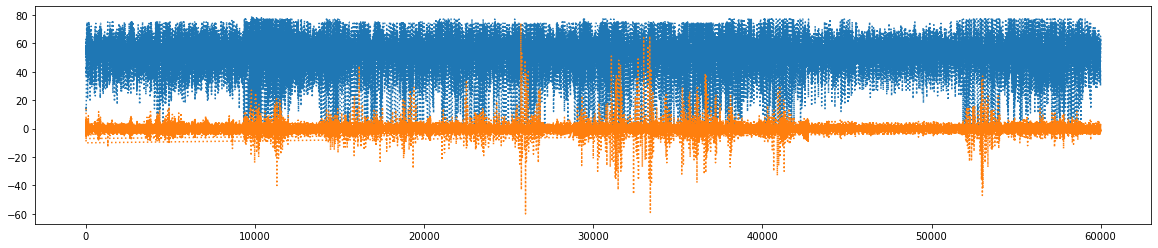

In [9]:
## Visualizing..
f = plt.figure()
f.set_figwidth(20)
plt.plot(X1.refer, linestyle = 'dotted')
plt.plot(X1.move, linestyle = 'dotted')
plt.show()

In [10]:
# grouping on mean the 250 rows for calculating a minute as 60000 rows equivalent to 4 minutes
x_new = X1.groupby(np.arange(len(X))//250).mean()

In [11]:
x_new.shape#Total of 20 minutes in 5 files each of 4 minutes of data.

(1200, 2)

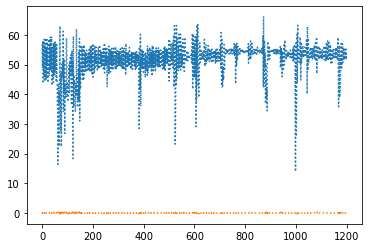

In [12]:
plt.plot(x_new.refer, linestyle = 'dotted')
plt.plot(x_new.move, linestyle = 'dotted')
plt.show()

In [13]:
import sys
np.set_printoptions(threshold=sys.maxsize)

# Using DBSCAN....

Number of clusters: 1
Outliers : 130


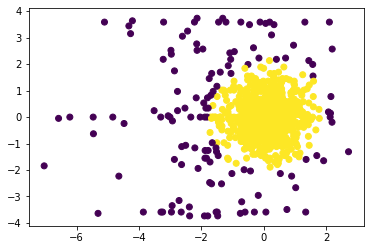

In [14]:
###..Importing libraries, standardising the data, 
##implementing the algorith ---eps is distance measure and min_samples is the number of values taken concurrently. 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
x_new1 = StandardScaler().fit_transform(x_new)
y_pred = DBSCAN(eps=0.65, min_samples=60).fit_predict(x_new1)
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(x_new1[:,0], x_new1[:,1], c=y_pred)    


##......Yellow shows no movement, the outliers shows movement......

In [15]:
import numpy as np
import array
a = np.array(y_pred)
np.where(a == -1)[0]##The seconds sleep is disturbed and movement observed....

array([   0,   11,   14,   34,   46,   47,   60,   61,   62,   63,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   75,   76,   77,
         79,   84,   86,   89,   91,   92,   93,   94,   96,   97,   98,
         99,  102,  104,  107,  115,  116,  118,  119,  120,  121,  122,
        124,  125,  127,  128,  130,  131,  132,  133,  134,  135,  138,
        139,  140,  141,  142,  144,  145,  146,  147,  148,  149,  151,
        152,  256,  257,  381,  382,  386,  387,  388,  389,  407,  519,
        520,  521,  524,  525,  528,  529,  558,  593,  598,  599,  605,
        606,  608,  609,  613,  617,  705,  707,  710,  711,  712,  714,
        762,  871,  872,  880,  882,  883,  884,  885,  886,  940,  941,
        945,  997,  998, 1001, 1002, 1004, 1005, 1006, 1007, 1044, 1045,
       1083, 1167, 1168, 1169, 1170, 1172, 1173, 1174, 1176], dtype=int32)

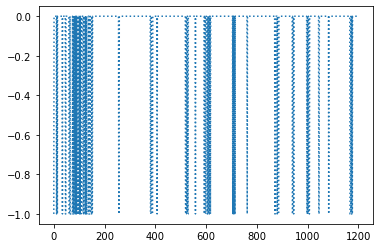

In [16]:
#Visualizing the conclusion...
plt.plot(a, linestyle = 'dotted')

plt.show()#The sleep state per second is displayed.

# Using KMeans....

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,max_iter=90)
kmeans.fit(x_new1)
y_kmeans = kmeans.predict(x_new1)

Outliers : 130


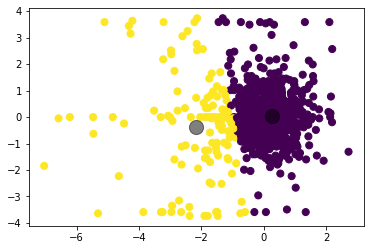

In [18]:
plt.scatter(x_new1[:, 0], x_new1[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
print('Outliers :', len(y_pred[np.where(y_kmeans == 1)]))

In [19]:
y_kmeans
b = np.array(y_kmeans)
np.where(b !=0)[0]

array([   4,    9,   12,   15,   18,   23,   28,   39,   42,   44,   49,
         55,   56,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   71,   72,   73,   75,   76,   78,   84,   86,
         89,   90,   91,   92,   93,   94,   98,   99,  100,  101,  102,
        103,  104,  107,  108,  110,  115,  116,  119,  121,  124,  125,
        127,  129,  130,  131,  132,  133,  134,  137,  138,  139,  140,
        141,  142,  144,  146,  148,  151,  158,  161,  164,  197,  200,
        256,  329,  382,  386,  388,  389,  406,  433,  500,  519,  520,
        524,  525,  526,  528,  530,  593,  596,  605,  606,  608,  615,
        617,  707,  710,  711,  713,  715,  762,  763,  871,  873,  874,
        880,  882,  884,  885,  886,  997,  998, 1001, 1002, 1005, 1019,
       1044, 1082, 1167, 1168, 1169, 1172, 1173, 1174, 1175], dtype=int32)

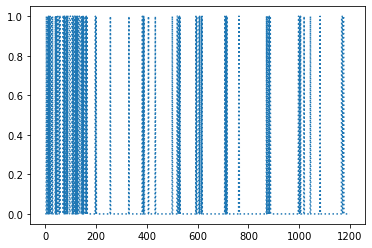

In [20]:
plt.plot(b, linestyle = 'dotted')

plt.show()# The sleep state per second is displayed.